In [1]:
import os
import cv2

# Open the default camera (camera index 0)
# You can try other indices (1, 2, etc.) if you have multiple cameras
cap = cv2.VideoCapture(3)

# Check if camera opened successfully
if not cap.isOpened():
    print("Error: Could not open camera.")
    exit()

print("Camera opened successfully. Press 'q' to quit.")

# Main loop to display camera feed
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    # If frame is read correctly ret is True
    if not ret:
        print("Error: Can't receive frame. Exiting...")
        break
    
    # Display the frame
    cv2.imshow('Camera', frame)
    
    # Press 'q' to exit (wait 1ms between frames)
    if cv2.waitKey(1) == ord('q'):
        break

# Release the camera and close windows
cap.release()
cv2.destroyAllWindows()

Camera opened successfully. Press 'q' to quit.


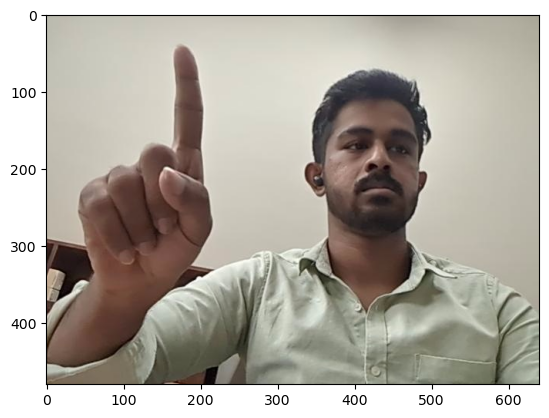

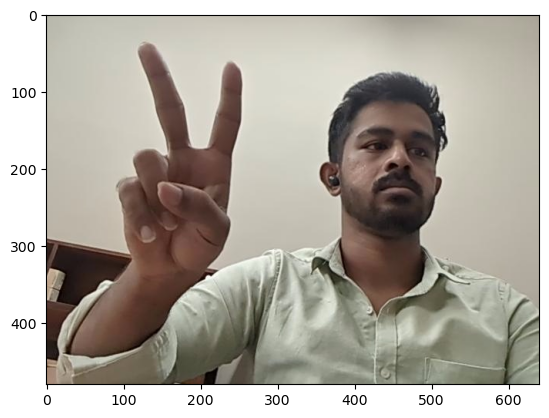

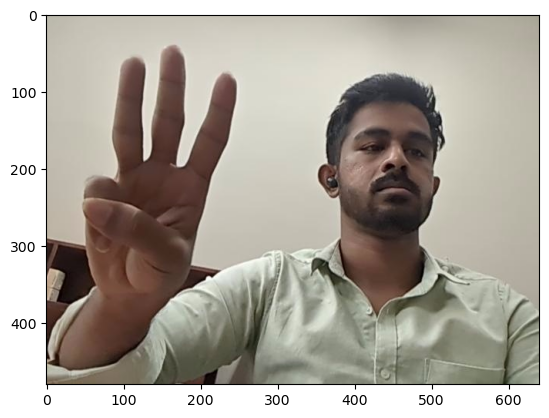

In [2]:
import os

import mediapipe as mp
import cv2
import matplotlib.pyplot as plt

DATA_DIR = "./data"

for dir_ in os.listdir(DATA_DIR):
    for img_path in os.listdir(os.path.join(DATA_DIR, dir_))[:1]:
        img = cv2.imread(os.path.join(DATA_DIR, dir_, img_path))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.figure()
        plt.imshow(img_rgb)


In [1]:
import pickle
import cv2
import mediapipe as mp
import numpy as np

model_dict = pickle.load(open("./model.p", "rb"))
model = model_dict["model"]

# Try camera index 0 if 3 doesn't work
cap = cv2.VideoCapture(0)  # Changed from 3 to 0

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

# Changed to False for better performance with video
hands = mp_hands.Hands(static_image_mode=False, min_detection_confidence=0.3)

labels_dict = {0: "1", 1: "2", 2: "3"}

while True:
    data_aux = []
    x_ = []
    y_ = []

    ret, frame = cap.read()
    if not ret:
        print("Failed to capture frame")
        break

    H, W, _ = frame.shape
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = hands.process(frame_rgb)

    if results.multi_hand_landmarks:
        # Draw landmarks for all detected hands
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(
                frame,
                hand_landmarks,
                mp_hands.HAND_CONNECTIONS,
                mp_drawing_styles.get_default_hand_landmarks_style(),
                mp_drawing_styles.get_default_hand_connections_style(),
            )

        # Process the first hand only to avoid confusion
        hand_landmarks = results.multi_hand_landmarks[0]

        # First collect coordinates
        for i in range(len(hand_landmarks.landmark)):
            x = hand_landmarks.landmark[i].x
            y = hand_landmarks.landmark[i].y
            x_.append(x)
            y_.append(y)

        # Then normalize and prepare feature vector
        for i in range(len(hand_landmarks.landmark)):
            x = hand_landmarks.landmark[i].x
            y = hand_landmarks.landmark[i].y
            data_aux.append(x - min(x_))
            data_aux.append(y - min(y_))

        x1 = int(min(x_) * W) - 10
        y1 = int(min(y_) * H) - 10
        x2 = int(max(x_) * W) - 10
        y2 = int(max(y_) * H) - 10

        prediction = model.predict([np.asarray(data_aux)])
        predicted_character = labels_dict[int(prediction[0])]

        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 0), 4)
        cv2.putText(
            frame,
            predicted_character,
            (x1, y1 - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            1.3,
            (0, 0, 0),
            3,
            cv2.LINE_AA,
        )

    cv2.imshow("frame", frame)

    # Wait for 1ms instead of indefinitely
    key = cv2.waitKey(1)
    # Break the loop if 'q' is pressed
    if key == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()


Failed to capture frame


In [ ]:
import pickle

import cv2
import mediapipe as mp
import numpy as np

model_dict = pickle.load(open("./model.p", "rb"))
model = model_dict["model"]

cap = cv2.VideoCapture(3)

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

labels_dict = {0: "1", 1: "2", 2: "3"}
while True:
    data_aux = []
    x_ = []
    y_ = []

    ret, frame = cap.read()

    H, W, _ = frame.shape

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    results = hands.process(frame_rgb)
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(
                frame,  # image to draw
                hand_landmarks,  # model output
                mp_hands.HAND_CONNECTIONS,  # hand connections
                mp_drawing_styles.get_default_hand_landmarks_style(),
                mp_drawing_styles.get_default_hand_connections_style(),
            )

        for hand_landmarks in results.multi_hand_landmarks:
            for i in range(len(hand_landmarks.landmark)):
                x = hand_landmarks.landmark[i].x
                y = hand_landmarks.landmark[i].y

                x_.append(x)
                y_.append(y)

            for i in range(len(hand_landmarks.landmark)):
                x = hand_landmarks.landmark[i].x
                y = hand_landmarks.landmark[i].y
                data_aux.append(x - min(x_))
                data_aux.append(y - min(y_))

        x1 = int(min(x_) * W) - 10
        y1 = int(min(y_) * H) - 10

        x2 = int(max(x_) * W) - 10
        y2 = int(max(y_) * H) - 10

        prediction = model.predict([np.asarray(data_aux)])

        predicted_character = labels_dict[int(prediction[0])]

        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 0), 4)
        cv2.putText(
            frame,
            predicted_character,
            (x1, y1 - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            1.3,
            (0, 0, 0),
            3,
            cv2.LINE_AA,
        )

    cv2.imshow("frame", frame)
    cv2.waitKey(0)


cap.release()
cv2.destroyAllWindows()
